In [1]:
import numpy as np
from glob import glob
import pandas as pd
import json

import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt
plt.style.use('ggplot')

In [2]:
path = glob('../experiments/test_mixup_ema/cifar10.1@5000-1/*/gradients.txt')[0]

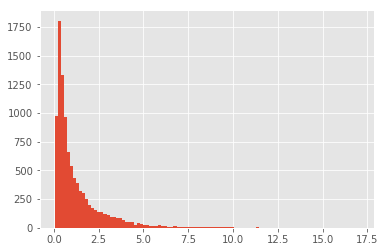

In [3]:
f = json.load(open(path, "r"))
df = pd.DataFrame(f)['gradients']
hist = df.hist(bins=100)

In [8]:
print('mean: ', df.mean())
print('std: ', df.std())

mean:  1.2897835457194597
std:  1.5128634947148845


In [18]:
path =glob('/data/dro-id_history/max_4_10@5000/cifar10.1@5000-1/FSgradient_LH4.0_archresnet_batch64_beta0.5_ema0.999_filters32_gamma1.0_lr0.002_nclass10_regularizermaxsup_repeat4_scales3_wd0.002/gr*')[0]

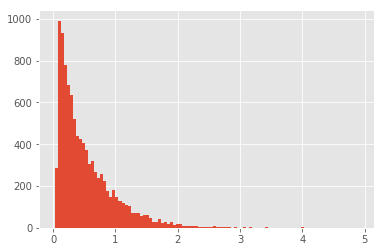

In [19]:
f = json.load(open(path, "r"))
df = pd.DataFrame(f)['gradients']
hist = df.hist(bins=100)

In [20]:
print('mean: ', df.mean())
print('std: ', df.std())

mean:  0.5317239585081115
std:  0.4676447400465336
